In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("titanic-passengers (1).csv")
df.head()
#replacing missing numerical values
df['Age'].fillna(df['Age'].mean() , inplace=True)
#replacing missing categorical values
number_of_elements = len(df['Cabin'])
print('number of elements : ' , number_of_elements)
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6' , inplace = True)
number_of_elements = len(df['Embarked'])
print('number of elements: ' ,number_of_elements)
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S' , inplace = True)
df.isnull().sum()
df.info()
df['Cabin'].values
# Transform from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
#Name
#encoder = LabelEncoder()
#df['Name']=encoder.fit_transform(df['Name'])
#Sex
encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
#Ticket
encoder = LabelEncoder()
df['Ticket']=encoder.fit_transform(df['Ticket'])
#Cabin
encoder = LabelEncoder()
df['Cabin']=encoder.fit_transform(df['Cabin'])
#Embarked
encoder = LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked'])
df

number of elements :  891
B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
C50            1
F E69          1
B69            1
A26            1
B94            1
Name: Cabin, Length: 147, dtype: int64
number of elements:  891
S    644
C    168
Q     77
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,523,7.2500,145,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,669,7.9250,145,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,472,8.0500,145,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,101,13.0000,145,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,675,23.4500,145,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,8,30.0000,60,0


# 1/Apply Logistic Regression

Accuracy=0.78


<AxesSubplot:xlabel='Age', ylabel='Survived'>

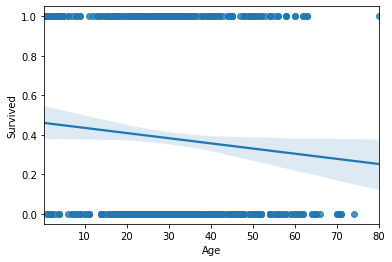

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
#features extraction
x=df[['Age','Sex','Fare']]
y=df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
#build logistic regression model
logreg=LogisticRegression()
#fitting the training data
logreg.fit(x_train,y_train)
#testing model perforrmance 
y_pred= logreg.predict(x_test)#testing model perforrmance 
print("Accuracy={:.2f}".format(logreg.score(x_test , y_test)))



#logistic regression distribution 
sns.regplot(x='Age' , y='Survived' , data=df)




# 2/evaluate model perforrmance

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

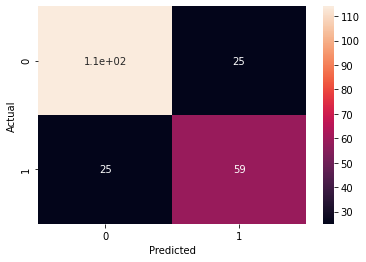

In [13]:
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=["Actual"], colnames=["Predicted"])
sns.heatmap(confusion_matrix, annot=True)

the model predected that 11e+02 passangers are survived and it was true and 59 are not gesstting survived and it it true 

# 3/ ROC/AUC

-it is one of the most evaluation merics for checking any classification model's performance
-it is just saying that we are calculating the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
-The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
It is a probability curve that plots the True Positive Rate(TPR) against False Positive Rate (FPR )at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
 

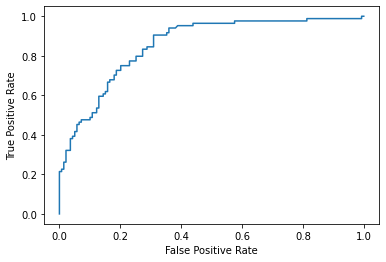

In [10]:
#define metrics
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.

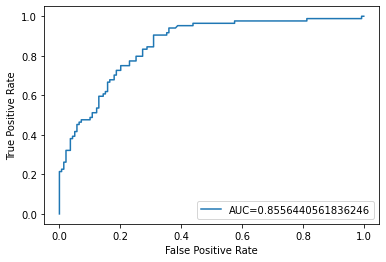

In [12]:
#define metrics
y_pred_proba =logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
The AUC for this logistic regression model turns out to be 0.855. Since this is close to 1, 
this confirms that the model does a good job of classifying data